In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 90

In [2]:
#DEG(s) that are both EP300 targets plus SASPs:
#Values represent Log2FC between eoPE vs term controls (Logistic Regression)
data= pd.read_csv('vSCT_final_sasp_main4_240522.csv', index_col= 'gene')

data.head()

,vSCT1,vSCT2,vSCTjuv
gene,,,
GDF15,-0.243680,0.250638,-0.225041
MIF,0.219369,0.151662,1.332533
MYOF,1.050423,1.114564,0.510683
HEXB,0.475846,0.305176,0.721103
HTRA1,0.879184,0.915218,1.073131


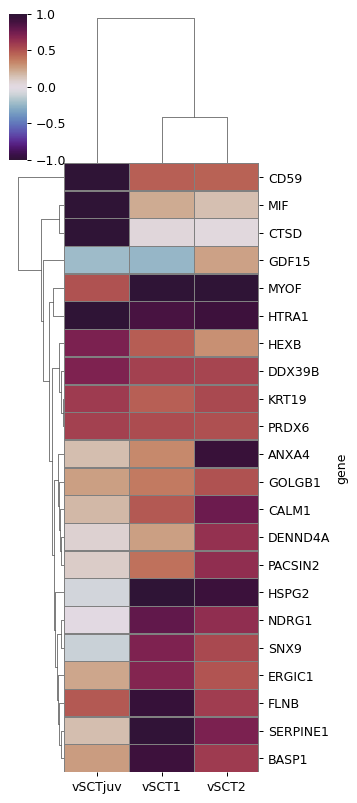

In [3]:
ep300_sasp_targets= ['GDF15', 'MIF', 'MYOF', 'HEXB', 'HTRA1', 'ANXA4', 'HSPG2', 'FLNB',
       'CTSD', 'CD59', 'SERPINE1', 'KRT19',
       'CALM1', 'PRDX6', 'GOLGB1', 'DENND4A', 'PACSIN2', 'BASP1',
       'ERGIC1', 'NDRG1', 'SNX9', 'DDX39B'] 

#Subset by features above: 
ep300_sasp= data.loc[ep300_sasp_targets, :] 

#Plot EP300 targets that are senescence-associated secretory phenotype (SASP) associated. 
#Targets are differentially expressed in STB cell states in eoPE. 
ax= sns.clustermap(ep300_sasp, yticklabels=True, vmax= 1, vmin= -1, 
                  col_cluster=True, figsize= (4,9),  
                  center=0, linecolor='grey', linewidth=0.3,row_cluster=True, 
                  cmap= 'twilight_shifted')

In [4]:
#Plot a heatmap with NA(s) masked:
#Read CSV where NA values are marked. 
df_all= pd.read_csv('PE_markers_stripplot_050422.csv')

#Pivot table: pick top genes dysregulated across "cell type:"
pe_heat= pd.pivot_table(df_all, values= 'avg_log2FC', 
                     index=['gene'], columns= 'cell_type')

#Subset only vSCT1/2 & vSCTjuv: 
pe_heat = pe_heat[[ 'vSCT1', 'vSCT2', 'vSCTjuv']]

#Subset by feature list: gene_list_final
data05= pe_heat.loc[ep300_sasp_targets, :] 
data05.index.values

array(['GDF15', 'MIF', 'MYOF', 'HEXB', 'HTRA1', 'ANXA4', 'HSPG2', 'FLNB',
       'CTSD', 'CD59', 'SERPINE1', 'KRT19', 'CALM1', 'PRDX6', 'GOLGB1',
       'DENND4A', 'PACSIN2', 'BASP1', 'ERGIC1', 'NDRG1', 'SNX9', 'DDX39B'],
      dtype=object)

In [8]:
#Order a/c to top clustering: 
ordered_list= ['CD59', 'MIF', 'CTSD', 'GDF15', 'MYOF', 'HTRA1', 'HEXB', 'DDX39B', 'KRT19', 'PRDX6', 'ANXA4', 
              'GOLGB1', 'CALM1', 'DENND4A', 'PACSIN2', 'HSPG2', 'NDRG1', 'SNX9', 'ERGIC1', 'FLNB', 'SERPINE1', 'BASP1']

data05= pe_heat.loc[ordered_list, :] 
data05.index.values

array(['CD59', 'MIF', 'CTSD', 'GDF15', 'MYOF', 'HTRA1', 'HEXB', 'DDX39B',
       'KRT19', 'PRDX6', 'ANXA4', 'GOLGB1', 'CALM1', 'DENND4A', 'PACSIN2',
       'HSPG2', 'NDRG1', 'SNX9', 'ERGIC1', 'FLNB', 'SERPINE1', 'BASP1'],
      dtype=object)

In [9]:
mask_na = 0.000666
df= data05.fillna(mask_na) #mask the NA values. 
df.head()

cell_type,vSCT1,vSCT2,vSCTjuv
gene,,,
CD59,0.466601,0.000666,2.936080
MIF,0.000666,0.000666,1.332533
CTSD,0.000666,0.000666,1.142648
GDF15,0.000666,0.250638,0.000666
MYOF,1.050423,1.114564,0.000666


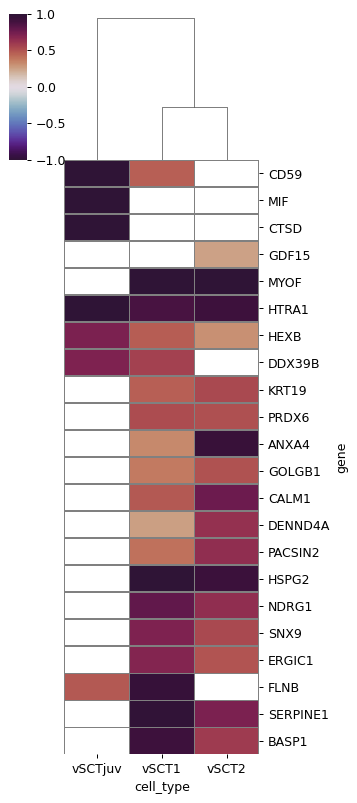

In [11]:
#Mask the NA values i.e., those cell types where a feature isn't a DEG would be masked. 
ax= sns.clustermap(df, mask=df == mask_na, yticklabels=True,  vmax=1, vmin= -1, 
                  col_cluster=True, figsize= (4,9), row_cluster=False, 
                  center=0, linecolor='grey', linewidth=0.3,
                  cmap= 'twilight_shifted')

#The empty cells (NAs) are formated with grey on Illustrator. 